#**Assignment on Sparks Fund Analysis**

* Created by: **Shreenidhi Kulkarni** | **2348455**
* Created Date: 25.05.2024
* Edited Dates: 26.05.2024

# Importing libraries

In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print("Libraries imported successfully..")

Libraries imported successfully..


# Loading the data

In [ ]:
# Load the datasets
print("Loading datasets...")
companies = pd.read_csv('/content/companies.csv', encoding='ISO-8859-1')
rounds2 = pd.read_csv('/content/rounds2.csv', encoding='ISO-8859-1')
mapping = pd.read_csv('/content/mapping.csv')
print("Datasets loaded successfully...")

Loading datasets...
Datasets loaded successfully...


In [ ]:
# Checking the first few rows of each dataframe to understand the data
print("Companies Data:")
print(companies.head())
print("\nRounds Data:")
print(rounds2.head())
print("\nMapping Data:")
print(mapping.head())

Companies Data:
                             permalink                    name  \
0                  /Organization/-Fame                   #fame   
1               /Organization/-Qounter                :Qounter   
2  /Organization/-The-One-Of-Them-Inc-  (THE) ONE of THEM,Inc.   
3                /Organization/0-6-Com                 0-6.com   
4       /Organization/004-Technologies        004 Technologies   

                        homepage_url  \
0                 http://livfame.com   
1             http://www.qounter.com   
2                http://oneofthem.jp   
3                 http://www.0-6.com   
4  http://004gmbh.de/en/004-interact   

                                       category_list     status country_code  \
0                                              Media  operating          IND   
1  Application Platforms|Real Time|Social Network...  operating          USA   
2                                  Apps|Games|Mobile  operating          NaN   
3                         

# Data Cleaning and Preprocessing

In [ ]:
# Filter investments between 5 to 15 million USD per round
print("\nFiltering investments between 5 to 15 million USD per round...")
rounds2 = rounds2[(rounds2['raised_amount_usd'] >= 5000000) & (rounds2['raised_amount_usd'] <= 15000000)]


Filtering investments between 5 to 15 million USD per round...


In [ ]:
# Filter companies in English-speaking countries
print("\nFiltering companies in English-speaking countries...")
english_speaking_countries = ['USA', 'GBR', 'CAN', 'AUS', 'IND', 'IRL', 'NZL', 'SGP', 'ZAF']
companies = companies[companies['country_code'].isin(english_speaking_countries)]


Filtering companies in English-speaking countries...


In [ ]:
# Convert permalink and company_permalink to lowercase for merging
print("\nConverting permalink and company_permalink to lowercase for merging...")
companies['permalink'] = companies['permalink'].str.lower()
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()


Converting permalink and company_permalink to lowercase for merging...


<ipython-input-59-55957e4999d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  companies['permalink'] = companies['permalink'].str.lower()


In [ ]:
# Merge the datasets
print("\nMerging datasets...")
merged_data = pd.merge(rounds2, companies, how='inner', left_on='company_permalink', right_on='permalink')
print("Datasets merged successfully...")


Merging datasets...
Datasets merged successfully...


In [ ]:
# Clean and process the mapping file
print("\nCleaning and processing the mapping file...")
mapping['category_list'] = mapping['category_list'].str.lower()
mapping = mapping.dropna()


Cleaning and processing the mapping file...


In [ ]:
# Checking for missing values
print("Missing Values in Master Frame:")
print(master_frame.isnull().sum())

Missing Values in Master Frame:
funding_round_permalink       0
funding_round_type            0
raised_amount_usd             0
name                          0
category_list                 0
status                        0
country_code                307
country                    1415
dtype: int64


In [ ]:
# Displaying the shape of the master_frame after cleaning
print("\nShape of Master Frame after Data Cleaning:", master_frame.shape)


Shape of Master Frame after Data Cleaning: (8275, 8)


In [ ]:
# Investment Type Analysis
investment_type_analysis = master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False)
print("\nInvestment Type Analysis:")
print(investment_type_analysis)


Investment Type Analysis:
funding_round_type
non_equity_assistance    15.000000
product_crowdfunding      9.434079
private_equity            9.311128
post_ipo_equity           9.041870
venture                   8.901626
grant                     8.608869
debt_financing            8.324043
undisclosed               8.154371
post_ipo_debt             8.070924
equity_crowdfunding       7.269717
angel                     7.053927
convertible_note          6.867947
seed                      6.631409
secondary_market          6.096198
Name: raised_amount_usd, dtype: float64


In [ ]:
# Country Analysis
country_mapping = {'AUS': 'Australia', 'CAN': 'Canada', 'GBR': 'United Kingdom', 'IND': 'India', 'SGP': 'Singapore', 'USA': 'United States'}
master_frame['country'] = master_frame['country_code'].apply(lambda x: country_mapping.get(x))
country_analysis = master_frame.groupby('country')['raised_amount_usd'].sum().sort_values(ascending=False)
print("\nCountry Analysis:")
print(country_analysis)


Country Analysis:
country
United States     54160.282180
United Kingdom     2734.806373
Canada             1900.208095
India              1381.377818
Singapore           391.203834
Australia           327.676919
Name: raised_amount_usd, dtype: float64


# Sector Analysis

In [ ]:
# Function to map sub-sector to main sector
def map_sector(category_list):
    if isinstance(category_list, str):
        sectors = category_list.split('|')
        for sector in sectors:
            if sector in mapping['category_list'].values:
                return mapping[mapping['category_list'] == sector]['main_sector'].iloc[0]
    return 'Others'

# Apply the mapping function to create a new column for main sector
merged_data['main_sector'] = merged_data['category_list'].apply(map_sector)

# Analysis

In [ ]:
# Investment type analysis
print("\nAnalyzing investment types...")
investment_type_analysis = merged_data.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False)


Analyzing investment types...


In [ ]:
# Country analysis
print("\nAnalyzing investments by country...")
country_analysis = merged_data.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)


Analyzing investments by country...


In [ ]:
# Sector analysis
print("\nAnalyzing investments by sector...")
sector_analysis = merged_data.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)


Analyzing investments by sector...


# Plotting visualizations

In [ ]:
# Plotting
sns.set(style="whitegrid")

<ipython-input-71-040d06bd2d27>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=investment_type_analysis.index, y=investment_type_analysis.values, palette='viridis')


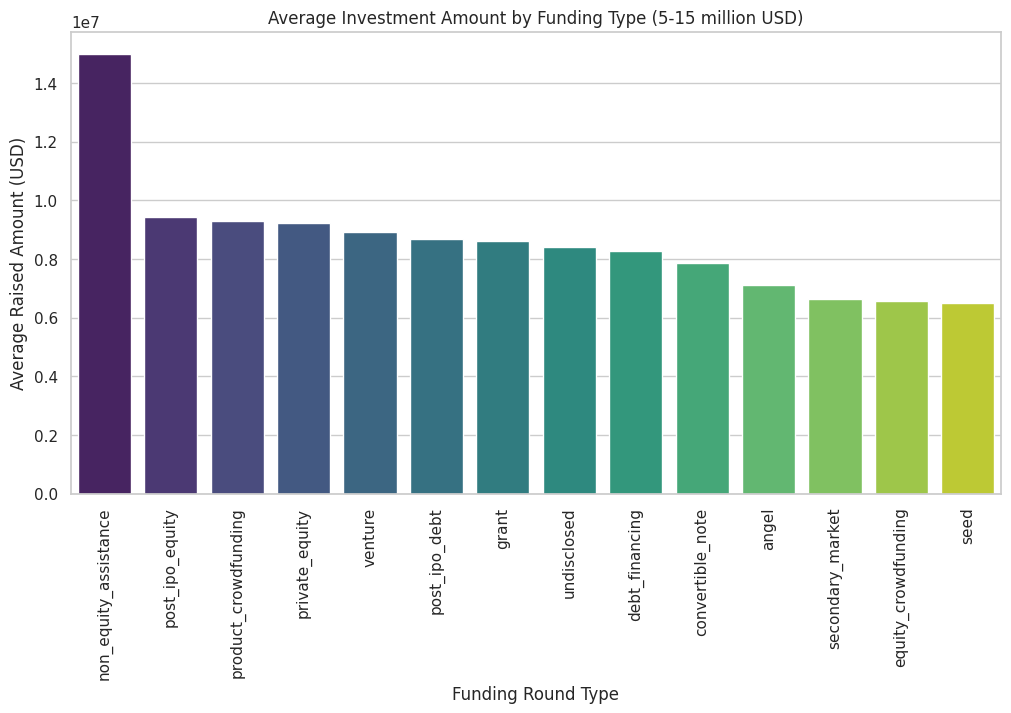

In [ ]:
# Investment Type Analysis
plt.figure(figsize=(12, 6))
sns.barplot(x=investment_type_analysis.index, y=investment_type_analysis.values, palette='viridis')
plt.title('Average Investment Amount by Funding Type (5-15 million USD)')
plt.xlabel('Funding Round Type')
plt.ylabel('Average Raised Amount (USD)')
plt.xticks(rotation=90)
plt.show()

<ipython-input-72-7d19949a2f7c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_analysis.index, y=country_analysis.values, palette='viridis')


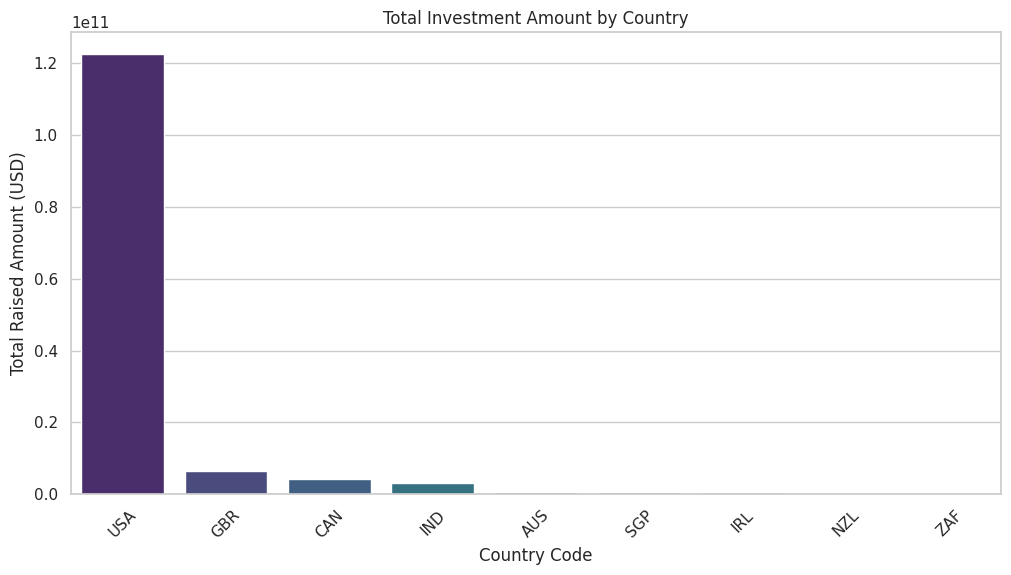

In [ ]:
# Country Analysis
plt.figure(figsize=(12, 6))
sns.barplot(x=country_analysis.index, y=country_analysis.values, palette='viridis')
plt.title('Total Investment Amount by Country')
plt.xlabel('Country Code')
plt.ylabel('Total Raised Amount (USD)')
plt.xticks(rotation=45)
plt.show()

<ipython-input-73-734290ff1e3a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sector_analysis.index, y=sector_analysis.values, palette='viridis')


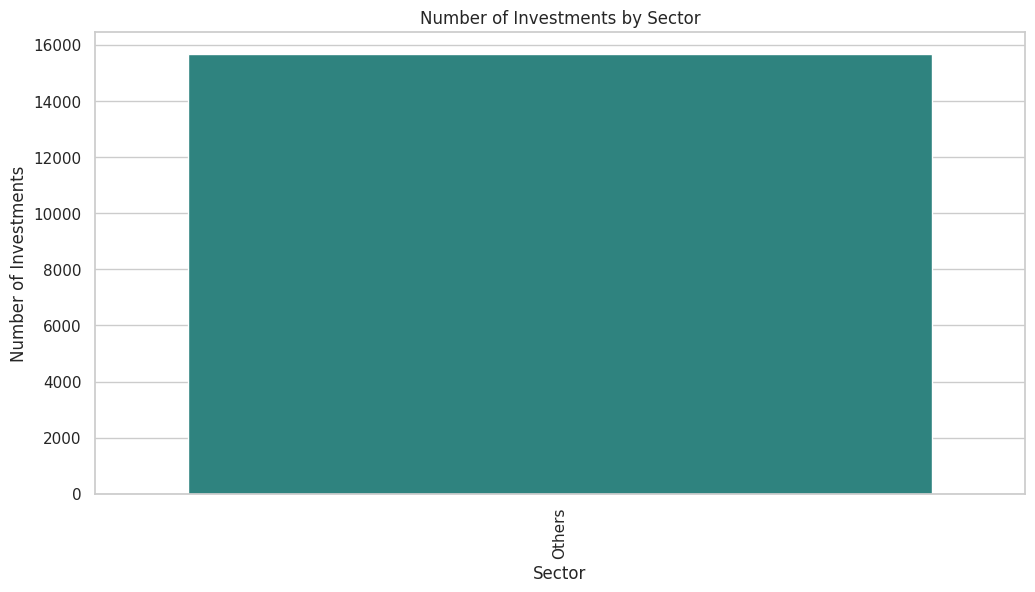

In [ ]:
# Sector Analysis
plt.figure(figsize=(12, 6))
sns.barplot(x=sector_analysis.index, y=sector_analysis.values, palette='viridis')
plt.title('Number of Investments by Sector')
plt.xlabel('Sector')
plt.ylabel('Number of Investments')
plt.xticks(rotation=90)
plt.show()